In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None
pd.options.display.max_info_columns=1000

In [2]:
df_acc = pd.read_csv('/home/darshan/Documents/accounts_24_dec.csv')
df_acc = df_acc.iloc[:, 1:]

In [42]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147845 entries, 0 to 147844
Data columns (total 61 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   base_source                                                     147845 non-null  object 
 1   Has Opportunity?                                                147845 non-null  object 
 2   madison_logics_leads_aggregated                                 147845 non-null  float64
 3   madison_logics_display_impressions_aggregated                   147845 non-null  float64
 4   madison_logics_clicks_aggregated                                147845 non-null  float64
 5   madison_logics_click_through_rate_aggregated                    147845 non-null  float64
 6   madison_logics_exposure_time_minutes_aggregated                 147845 non-null  float64
 7   madison_logics_site_visits_aggregated 

In [51]:
# Count zero values per column
zero_values_count = (df_acc == 0).sum()

# Sort the zero values count in ascending order
zero_values_sorted = zero_values_count.sort_values()

# Print the sorted count of zero values per column
print("Columns with count of zero values sorted in ascending order:")
print(zero_values_sorted)


Columns with count of zero values sorted in ascending order:
campaign_members_total_campaign_targated                           10947
campaign_members_campaign_status_in_progress                       14830
cleaned_industry                                                   22482
cleaned_employees                                                  26592
cleaned_revenue                                                    32244
campaign_members_total_leads                                       43184
campaign_members_salesforce_instance_vbc_leads                     47633
campaign_members_total_campaign_responded                          53170
campaign_members_campaign_type_Content                             76513
campaign_members_campaign_type_Digital                             82034
campaign_members_total_contacts                                   107429
campaign_members_salesforce_instance_vbc_contacts                 109737
campaign_members_campaign_type_Email                           

## Model Training With Past Opportunity Data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import xgboost
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [44]:
# Remove 'Has Opportunity?' column
df_acc = df_acc.drop(columns=['Has Opportunity?'])

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Explicitly encode each object column
df_acc['base_source'] = label_encoder.fit_transform(df_acc['base_source'])
df_acc['cleaned_industry'] = label_encoder.fit_transform(df_acc['cleaned_industry'])

# Display updated DataFrame info
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147845 entries, 0 to 147844
Data columns (total 60 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   base_source                                                     147845 non-null  int64  
 1   madison_logics_leads_aggregated                                 147845 non-null  float64
 2   madison_logics_display_impressions_aggregated                   147845 non-null  float64
 3   madison_logics_clicks_aggregated                                147845 non-null  float64
 4   madison_logics_click_through_rate_aggregated                    147845 non-null  float64
 5   madison_logics_exposure_time_minutes_aggregated                 147845 non-null  float64
 6   madison_logics_site_visits_aggregated                           147845 non-null  float64
 7   madison_logics_exposure_time_per_site_

In [45]:
# Separate features and target
X = df_acc.drop(columns=['score'])
y = df_acc['score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (118276, 59)
Testing features shape: (29569, 59)
Training target shape: (118276,)
Testing target shape: (29569,)


### Random forest

In [46]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R-squared Score (R2): {r2_score(y_test, y_pred):.4f}")

Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0001
R-squared Score (R2): 1.0000


/tmp/ipykernel_722944/2529268746.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


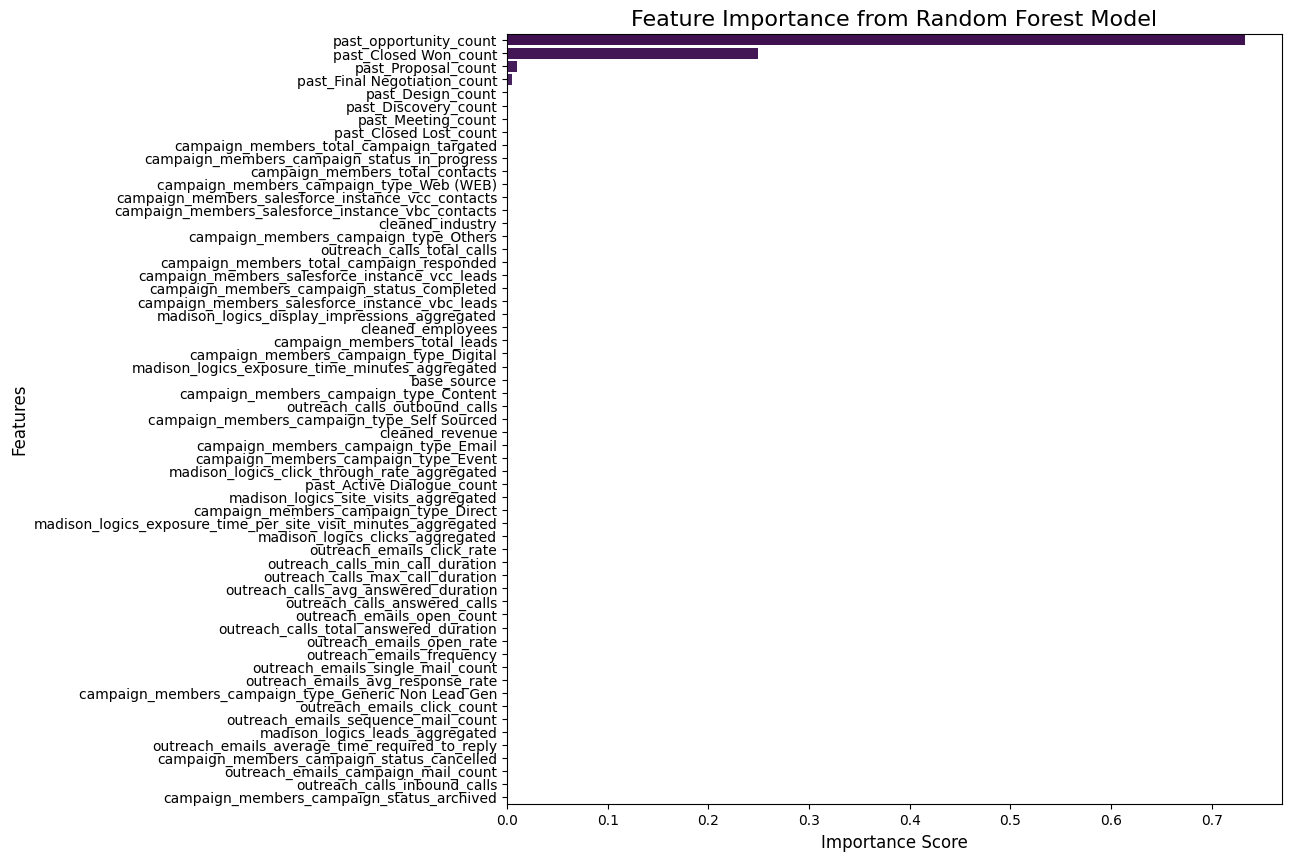

In [47]:
# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

### XGBoost

In [48]:
# Train the XGBoost model
xg_model = xgboost.XGBRegressor(n_estimators=50)
xg_model.fit(X_train, y_train)

# Make predictions
y_pred = xg_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0005
Mean Absolute Error (MAE): 0.0002
R^2 Score: 1.0000


<Figure size 1000x800 with 0 Axes>

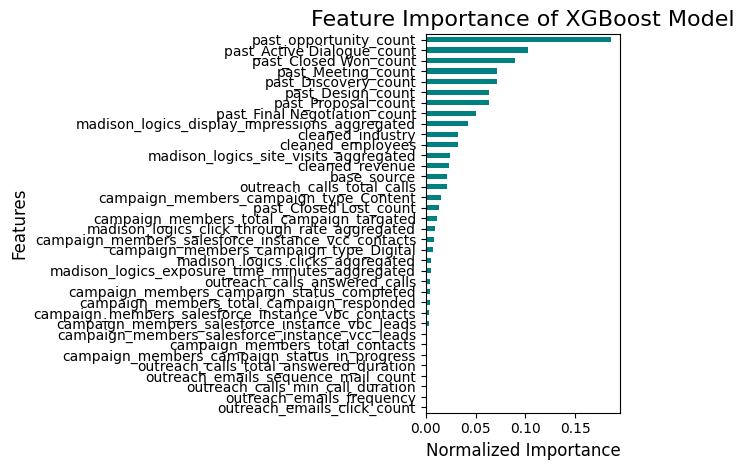

In [49]:
# Get feature importance from XGBoost model
feature_importance = xg_model.get_booster().get_score(importance_type='weight')

# Normalize importance values
total_importance = sum(feature_importance.values())
normalized_importance = {k: v / total_importance for k, v in feature_importance.items()}

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': normalized_importance.keys(),
    'Importance': normalized_importance.values()
}).sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 8))
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, color='teal')
plt.title('Feature Importance of XGBoost Model', fontsize=16)
plt.xlabel('Normalized Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()